<a href="https://colab.research.google.com/github/joseira/mental_health/blob/main/mental_health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mental Health

The project follows a structured CRISP-DM Framework, including:
1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling
5. Define your features (X) and your target variable (y)
6. Evaluation
7. Deployment

Project Contributors
This project was developed by:
Joseira Malledo

# 1- Business Understanding

This project aim to explore the question: Can eating disorders be linked to mental health?
       
This question is crucial because mental health plays a fundamental role in people's lives and society as a whole. Poor mental health affects our well-being, work performance, and relationships with friends, family, and the broader community. Mental health conditions are widespread, with hundreds of millions of individuals affected each year, and many more experiencing them over the course of their lives. It is estimated that one in three women and one in five men will experience major depression at some point in their lives.
Understanding this relationship is important for researchers and healthcare professionals, as it provides an additional tool for addressing mental health disorders. By focusing on dietary habits as a potential root cause, treatments could move beyond traditional chemical interventions to include dietary changes as a primary treatment strategy. The dataset provided offers valuable information on conditions such as Schizophrenia, Anxiety, Depression, and Bipolar Disorder.

If this question remains unaddressed, we risk continuing with conventional mental health treatments without considering the possibility that underlying eating disorders—such as food intolerances, like gluten sensitivity could be contributing to the problem. Without awareness, patients may unknowingly consume foods that are toxic to them, leading to physical and mental health repercussions.

# 2- Data Understanding

###Import Libraries and Data Loading

Well, let's get started.
</p>
</div>

In [64]:
#import important libraries
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import xgboost as xgb
from sklearn import preprocessing
from sklearn import metrics
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

In [65]:
# Data Source: https://www.kaggle.com/datasets/imtkaggleteam/mental-health/data

Data1 = pd.read_csv("data/1- mental-illnesses-prevalence.csv")


In [66]:
df1 = pd.DataFrame(Data1)

In [67]:
def describe(df):


    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []


    for item in df.columns:
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())


    output = pd.DataFrame({
        'variable': variables,
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing value': missing
    })

    return output

In [68]:
class color:
   BLUE = '\033[94m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [69]:
print(color.BOLD + color.BLUE + color.UNDERLINE +
      '"The describe table of df1 : Mental illness dataframe"' + color.END)
print(describe(df1))
print("\n")

"The describe table of df1 : Mental illness dataframe"
                                            variable    dtype  count  unique  \
0                                             Entity   object   6420     214   
1                                               Code   object   6420     206   
2                                               Year    int64   6420      30   
3  Schizophrenia disorders (share of population) ...  float64   6420    6406   
4  Depressive disorders (share of population) - S...  float64   6420    6416   
5  Anxiety disorders (share of population) - Sex:...  float64   6420    6417   
6  Bipolar disorders (share of population) - Sex:...  float64   6420    6385   
7  Eating disorders (share of population) - Sex: ...  float64   6420    6417   

   missing value  
0              0  
1            270  
2              0  
3              0  
4              0  
5              0  
6              0  
7              0  




In [70]:
df1.shape

(6420, 8)

###Numerical Features


In [71]:
print("\nDescriptive Statistics of Numerical Variables:")
df1.describe()


Descriptive Statistics of Numerical Variables:


,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
count,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000
mean,2004.500000,0.266604,3.767036,4.101840,0.636968,0.195664
std,8.656116,0.039383,0.925286,1.050543,0.233391,0.138380
min,1990.000000,0.188416,1.522333,1.879996,0.181667,0.044780
25%,1997.000000,0.242267,3.080036,3.425846,0.520872,0.096416
50%,2004.500000,0.273477,3.636772,3.939547,0.579331,0.144150
75%,2012.000000,0.286575,4.366252,4.564164,0.844406,0.251167
max,2019.000000,0.462045,7.645899,8.624634,1.506730,1.031688


###Categorical Variables

In [72]:
print("\nDescriptive Statistics of Categorical Variables Df1")
print(df1.describe(include=['object', 'category']))


Descriptive Statistics of Categorical Variables Df1
             Entity  Code
count          6420  6150
unique          214   205
top     Afghanistan   AFG
freq             30    30


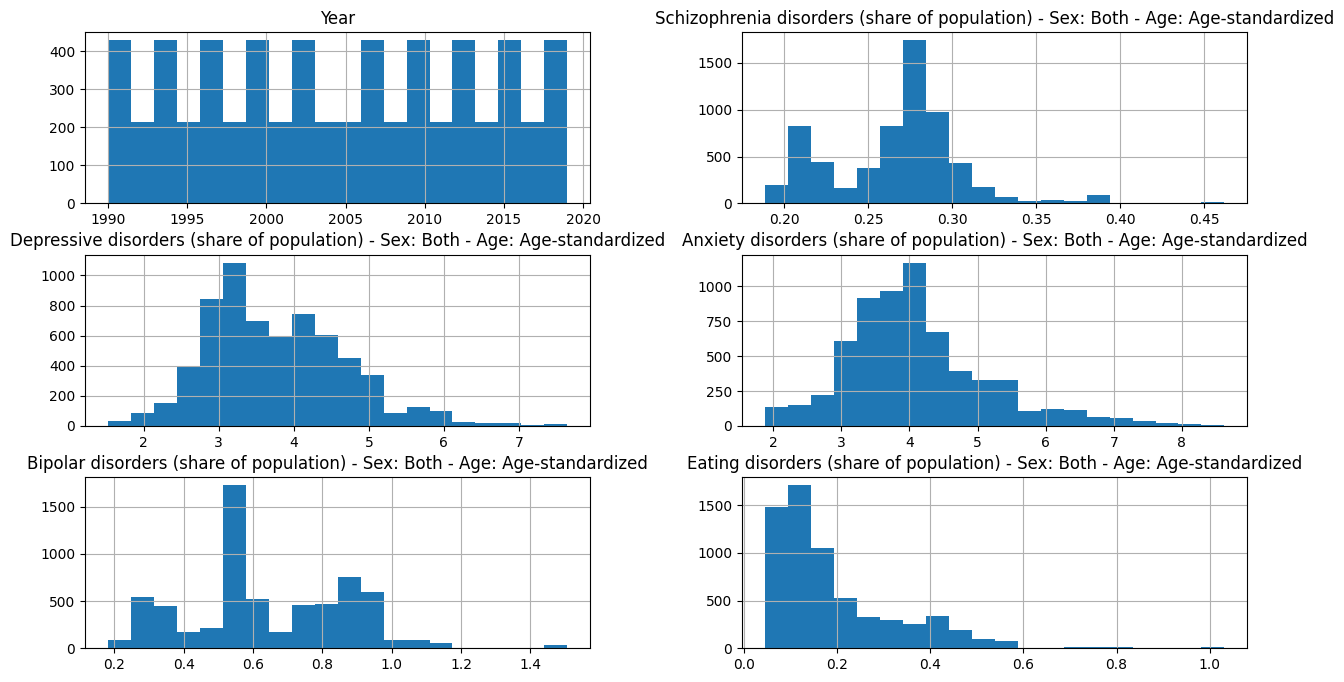

In [73]:
# Histogram for numerical variables features only
df1_numeric = df1.select_dtypes(include=['float64', 'int64'])
df1_numeric.hist(bins=20, figsize=(15, 8))
plt.show()

#3- Data Preparation

###Rename Columns

In [74]:
df1_column_names = list(df1.columns.values)
df1_column_names

['Entity',
 'Code',
 'Year',
 'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized',
 'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized',
 'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized',
 'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized',
 'Eating disorders (share of population) - Sex: Both - Age: Age-standardized']

In [75]:
df1 = df1.rename(columns={'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized': 'Schizophrenia disorders',
                          'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized': 'Depressive disorders',
                         'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized':'Anxiety disorders',
                         'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized':'Bipolar disorders',
                         'Eating disorders (share of population) - Sex: Both - Age: Age-standardized':'Eating disorders'})

In [76]:
df1_variables = df1[["Schizophrenia disorders","Depressive disorders","Anxiety disorders","Bipolar disorders",
                       "Eating disorders"]]

###Correlation

In [77]:
Corrmat = df1_variables.corr()

<Axes: title={'center': 'Correlation Heatmap'}>

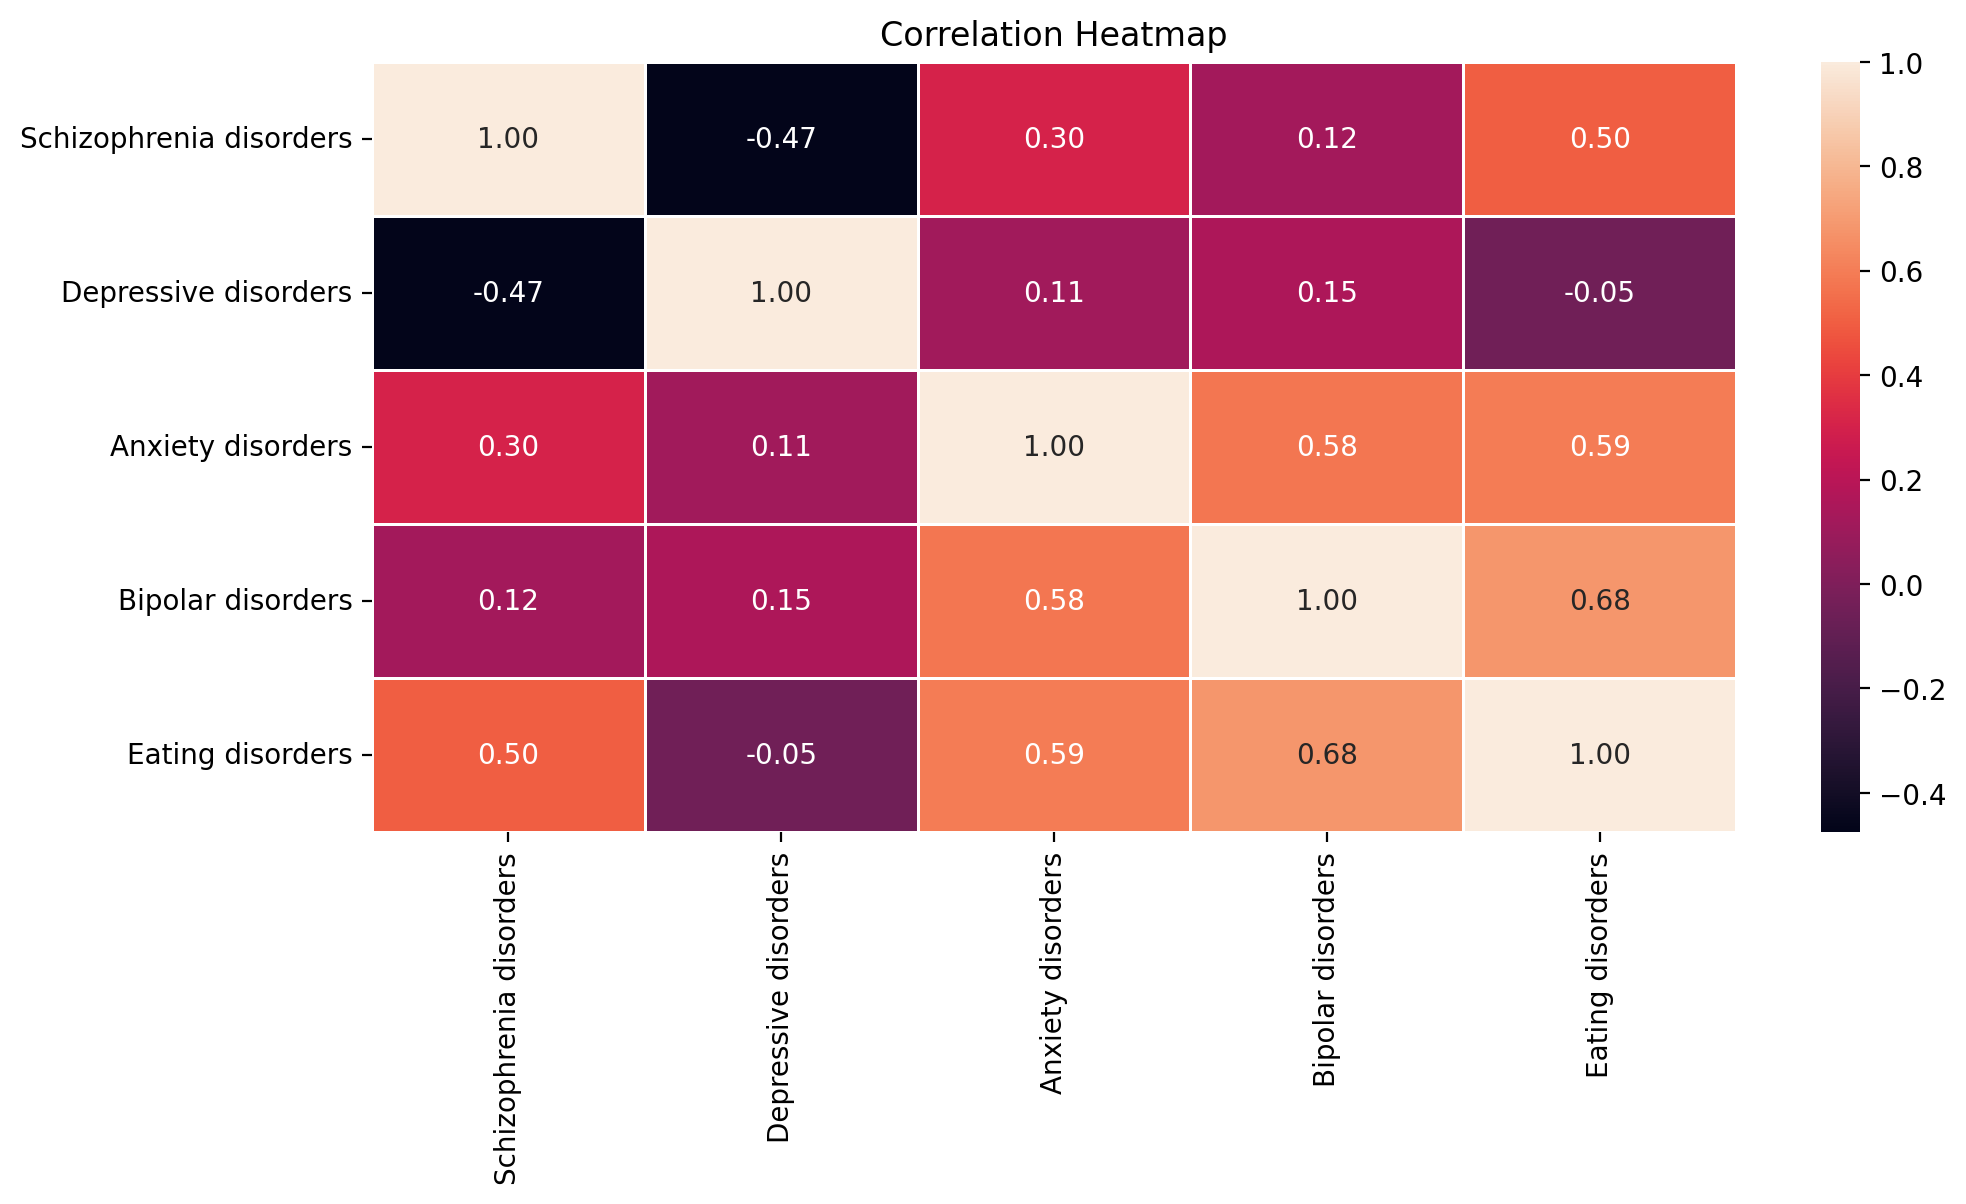

In [78]:
plt.figure(figsize=(11, 5), dpi=200)
plt.title('Correlation Heatmap')
sns.heatmap(Corrmat, annot=True,fmt=".2f", linewidth=.5)

#4- Modeling

In [79]:
categorical_columns = ['Entity', 'Code']
numerical_columns = ['Year', 'Schizophrenia disorders', 'Depressive disorders','Anxiety disorders','Bipolar disorders']

results = []
pd.set_option('display.max_rows', None)
def run_model(name, model, X_train, X_test, y_train, y_test):
  train_time = time.time()
  model.fit(X_train, y_train)
  train_time = (time.time() - train_time)
  pred_train = model.predict(X_train)
  pred_test = model.predict(X_test)
  train_r2 = r2_score(y_train, pred_train)
  test_r2 = r2_score(y_test, pred_test)
  train_mse = mean_squared_error(y_train, pred_train)
  train_mae = mean_absolute_error(y_train, pred_train)
  test_mse = mean_squared_error(y_test, pred_test)
  test_mae = mean_absolute_error(y_test, pred_test)
  coefs = []

  feature_names = X_train.columns.to_list()
  if hasattr(model, 'named_steps'):
    if 'transformer' in model.named_steps:
      transformer = model.named_steps['transformer']
      feature_names = transformer.get_feature_names_out()
      if 'logreg' in model.named_steps:
        for index, coef in enumerate(model.named_steps['logreg'].coef_[0]):
          try:
            numerical_column_index = numerical_columns.index(feature_names[index])
            if hasattr(transformer, 'standardscaler'):
              coef = coef / transformer['standardscaler'].scale_[numerical_column_index] / df[feature_names[index]].std()
          except ValueError:
            pass
          coefs.append({ 'Feature Name': feature_names[index], 'Coefficient': coef })
        display(pd.DataFrame(coefs).sort_values(by='Coefficient'))

  best_params = ''
  if hasattr(model, 'best_params_'):
    best_params = str(model.best_params_)
  result = { 'Model': name, 'Train Time': train_time, 'Train R2': train_r2, 'Test R2': test_r2, 'Train MSE': train_mse, 'Test MSE': test_mse, 'Train MAE': train_mae, 'Test MAE': test_mae, 'Best Parameters': best_params }
  results.append(result)


#5- Define your features (X) and your target variable (y)

In [80]:
X = df1[numerical_columns + categorical_columns]
y = df1['Eating disorders']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
# Check the size of the sets
print(f"Training set size: {X_train.shape}. Training labels size: {y_train.shape}")
print(f"Test set size: {X_test.shape}. Test labels size: {y_test.shape}")

Training set size: (5136, 7). Training labels size: (5136,)
Test set size: (1284, 7). Test labels size: (1284,)


###Modelo1 Linear Regression

In [82]:
transformer = make_column_transformer((OneHotEncoder(handle_unknown='ignore'),
                                      categorical_columns),
                                      (MinMaxScaler(),
                                      numerical_columns))
pipe = Pipeline([('transformer', transformer), ('linreg', LinearRegression())])
run_model('LinearRegression, One Hot Encoder, MinMax Scaler', pipe, X_train, X_test, y_train, y_test)
display(pd.DataFrame(results))

,Model,Train Time,Train R2,Test R2,Train MSE,Test MSE,Train MAE,Test MAE,Best Parameters
0,"LinearRegression, One Hot Encoder, MinMax Scaler",0.026332,0.991285,0.992141,0.000165,0.000157,0.007338,0.007449,


###Modelo2 Ramdom Forest Regressor

In [83]:
transformer = make_column_transformer((OneHotEncoder(handle_unknown='ignore'),
                                      categorical_columns),
                                      (MinMaxScaler(),
                                      numerical_columns))
pipe = Pipeline([('transformer', transformer), ('decisiontree', RandomForestRegressor())])
run_model('RandomForestRegressor, One Hot Encoder, MinMax Scaler', pipe, X_train, X_test, y_train, y_test)
display(pd.DataFrame(results))

,Model,Train Time,Train R2,Test R2,Train MSE,Test MSE,Train MAE,Test MAE,Best Parameters
0,"LinearRegression, One Hot Encoder, MinMax Scaler",0.026332,0.991285,0.992141,0.000165,0.000157,0.007338,0.007449,
1,"RandomForestRegressor, One Hot Encoder, MinMax...",15.368341,0.999799,0.998782,0.000004,0.000024,0.000773,0.001947,


###Modelo3 Ramdom Forest Regressor with parameter

In [84]:
transformer = make_column_transformer((OneHotEncoder(handle_unknown='ignore'),
                                      categorical_columns),
                                      (MinMaxScaler(),
                                      numerical_columns))
pipe = Pipeline([('transformer', transformer), ('decisiontree', RandomForestRegressor(max_depth=5))])
run_model('RandomForestRegressor max depth 5, One Hot Encoder, MinMax Scaler', pipe, X_train, X_test, y_train, y_test)
display(pd.DataFrame(results))

,Model,Train Time,Train R2,Test R2,Train MSE,Test MSE,Train MAE,Test MAE,Best Parameters
0,"LinearRegression, One Hot Encoder, MinMax Scaler",0.026332,0.991285,0.992141,0.000165,0.000157,0.007338,0.007449,
1,"RandomForestRegressor, One Hot Encoder, MinMax...",15.368341,0.999799,0.998782,0.000004,0.000024,0.000773,0.001947,
2,"RandomForestRegressor max depth 5, One Hot Enc...",1.753386,0.898576,0.892189,0.001920,0.002154,0.030758,0.031615,


###Modelo3 XGBoost

In [85]:
transformer = make_column_transformer((OneHotEncoder(handle_unknown='ignore'),
                                      categorical_columns),
                                      (MinMaxScaler(),
                                      numerical_columns))
pipe = Pipeline([('transformer', transformer), ('xgb', xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=5, eta=0.1))])
run_model('XGBoost, One Hot Encoder, MinMax Scaler', pipe, X_train, X_test, y_train, y_test)
display(pd.DataFrame(results))

,Model,Train Time,Train R2,Test R2,Train MSE,Test MSE,Train MAE,Test MAE,Best Parameters
0,"LinearRegression, One Hot Encoder, MinMax Scaler",0.026332,0.991285,0.992141,0.000165,0.000157,0.007338,0.007449,
1,"RandomForestRegressor, One Hot Encoder, MinMax...",15.368341,0.999799,0.998782,0.000004,0.000024,0.000773,0.001947,
2,"RandomForestRegressor max depth 5, One Hot Enc...",1.753386,0.898576,0.892189,0.001920,0.002154,0.030758,0.031615,
3,"XGBoost, One Hot Encoder, MinMax Scaler",0.183427,0.990983,0.989850,0.000171,0.000203,0.010223,0.010874,


In [86]:
pd.DataFrame(results).sort_values('Test R2', ascending=False)

,Model,Train Time,Train R2,Test R2,Train MSE,Test MSE,Train MAE,Test MAE,Best Parameters
1,"RandomForestRegressor, One Hot Encoder, MinMax...",15.368341,0.999799,0.998782,0.000004,0.000024,0.000773,0.001947,
0,"LinearRegression, One Hot Encoder, MinMax Scaler",0.026332,0.991285,0.992141,0.000165,0.000157,0.007338,0.007449,
3,"XGBoost, One Hot Encoder, MinMax Scaler",0.183427,0.990983,0.989850,0.000171,0.000203,0.010223,0.010874,
2,"RandomForestRegressor max depth 5, One Hot Enc...",1.753386,0.898576,0.892189,0.001920,0.002154,0.030758,0.031615,


# 6- Evaluation


We evaluated four models with numerical features (NF) scaled using MinMax Scaler, and categorical features (CF) encoded using One-Hot Encoder, analyzing R² (Coefficient of Determination):

Model 1: Linear Regression, R² = 99.21%

Model 2: Random Forest (no parameters), R² = 99.85%

Model 3: Random Forest (with max depth = 5), R² = 89.08%

Model 4: XGBoost, R² = 98.98%

Findings:
The highest R² (Coefficient of Determination) was achieved with Random Forest (Model 2). However, based on the other values, there appears to be overfitting in this model. To address this, we evaluated Model 3, a Random Forest with a reduced maximum depth of 5, but the R² worsened to 89.08%. For this reason, Linear Regression (Model 1) is considered the best option, with an R² of 99.21%. This indicates that 99.21% of the variance in the data can be explained by the model, demonstrating a very good fit.


#7. Deployment

The chosen model explains 99.21% of the variation in eating disorders based on variables such as schizophrenia, depressive disorders, anxiety disorders, bipolar disorders, country, and year. With an R² close to 1, the model provides useful insights into the factors influencing eating disorders.

According to the data, there is a close relationship between mental health conditions and eating disorders. Identifying this relationship opens the door to more in-depth investigations. For instance, surveys could help determine the connection between diet and improvements in mental health conditions.

Refining Business Knowledge for Decision-Making:
The model we identified helps explain the variation in eating disorders through mental health conditions with strong accuracy. However, there is still much more to explore in order to develop more targeted interventions—such as examining the relationship between mental health and the elimination of sugar from the diet, or the restriction of foods that may be toxic for certain individuals, like gluten. Collaborating with health researchers is crucial for identifying opportunities to expand research on how nutrition can serve as a tool to improve mental health. Understanding this connection is valuable for both researchers and healthcare professionals, as it offers an additional approach to addressing mental health disorders. By viewing dietary habits as a potential root cause, treatment strategies could go beyond traditional pharmaceutical methods and include nutritional changes as a core part of care. The dataset used provides valuable insights into conditions such as schizophrenia, anxiety, depression, and bipolar disorder.